In [1]:
# 🌸 Iris Flower Classification

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
import warnings

In [10]:
warnings.filterwarnings('ignore')

In [11]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [12]:
# 📂 Loading the Dataset

In [13]:
iris = pd.read_csv("C:/Users/Sangee/Desktop/IRIS.csv")

In [ ]:
#removing spaces and lowercase

In [15]:
iris.columns = iris.columns.str.strip().str.lower().str.replace(" ", "_")

In [16]:
print("Columns:", iris.columns.tolist())
print(iris.head())

Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [17]:
# 📊 VISUAL 1: Bar Plot - Count of each species

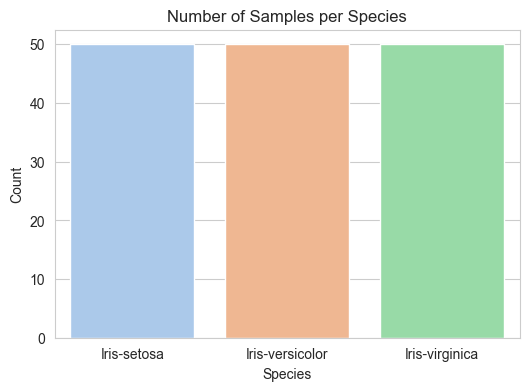

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=iris, palette='pastel')
plt.title("Number of Samples per Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

In [20]:
# 📊 VISUAL 2: Box Plot - Petal Length by Species

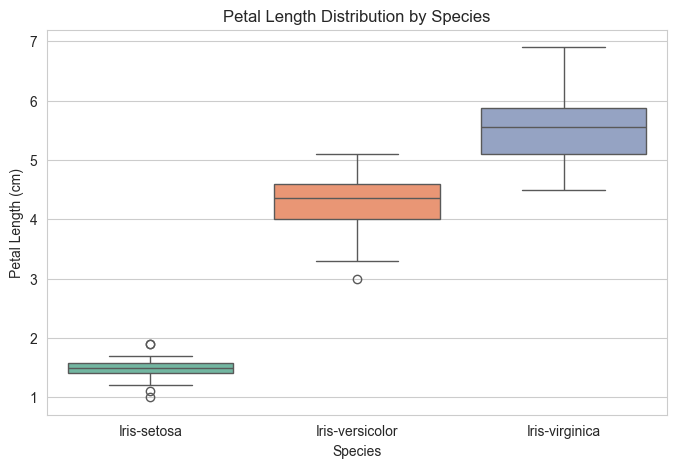

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='species', y='petal_length', data=iris, palette='Set2')
plt.title("Petal Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

In [22]:
# 📊 VISUAL 3: Scatter Plot - Petal Length vs Width

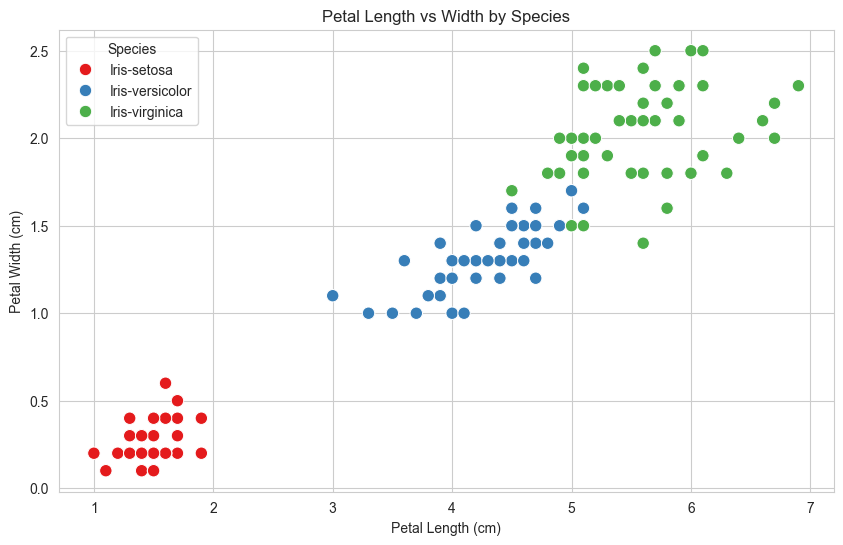

In [23]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='Set1', s=80)
plt.title("Petal Length vs Width by Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Species')
plt.show()

In [24]:
# 🧠 Label Encoding
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

In [25]:
# 🎯 Train/Test Split
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# 🌲 Training the model using RandomForestClassifier

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
# Evaluation

In [29]:
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

✅ Accuracy: 100.0 %

📋 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [30]:
# 🔍 Confusion Matrix

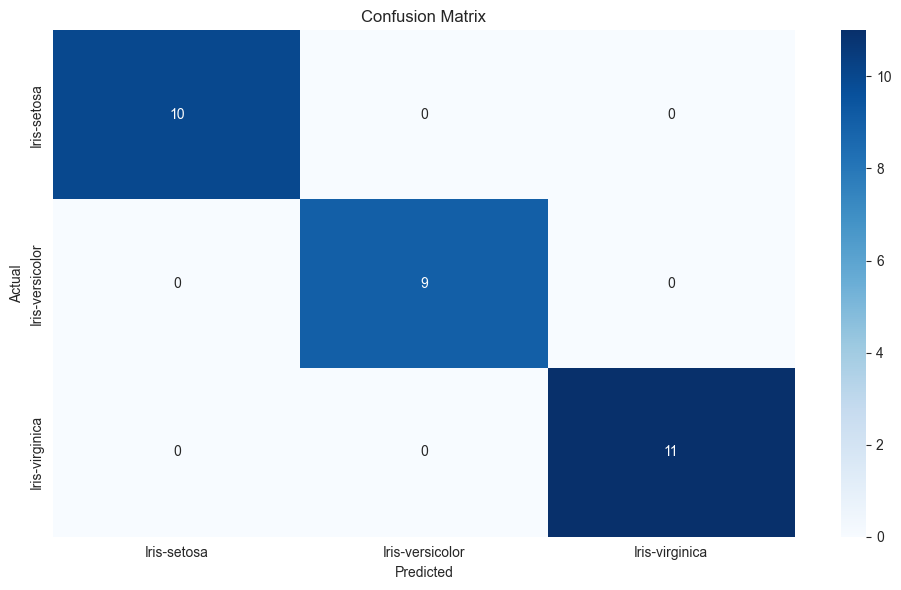

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [32]:
# Feature Importance 

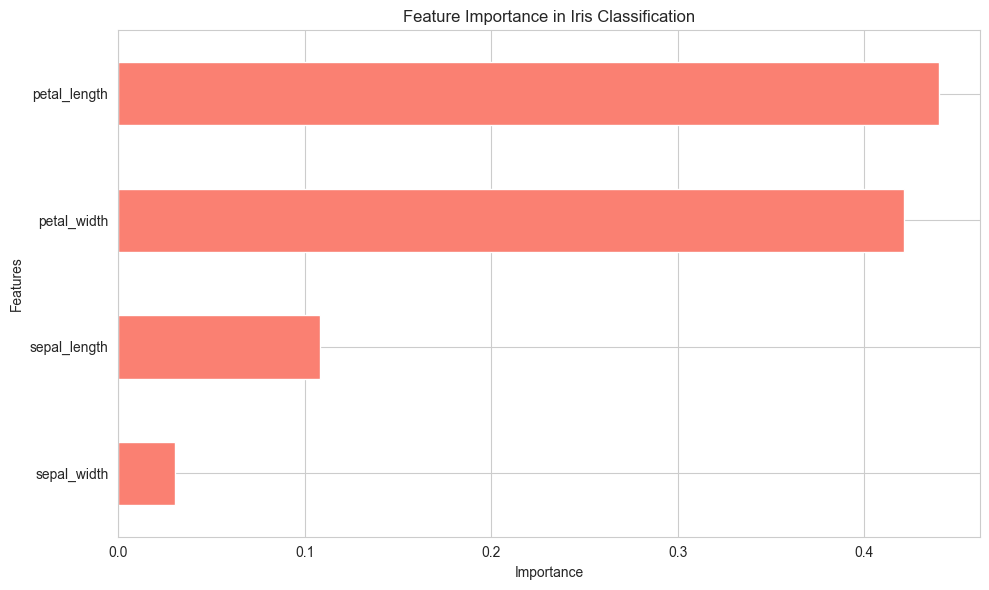

In [33]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values()
feat_importance.plot(kind='barh', color='salmon')
plt.title("Feature Importance in Iris Classification")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()